In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
#                      "legend.title_fontproperties": {'weight':'bold'}

                    }
                   )

In [3]:
datafile = 'truecode-performance-20230331.csv'

In [4]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-03-31')

In [5]:
def total_return(prices):
  return prices.iloc[-1] / prices.iloc[0] - 1

In [6]:
prices = pd.read_csv(datafile)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

In [7]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2023-03-27,"55,511.0500","38,507.5000"
2023-03-28,"56,438.6400","38,700.8000"
2023-03-29,"58,349.3700","40,244.7000"


# Fund Statistics

In [8]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2023-03-31  2023-03-31
Risk-free rate       0.00%       0.00%

Total Return         19.41%      -23.22%
Daily Sharpe         0.58        -0.12
Daily Sortino        0.96        -0.19
CAGR                 21.40%      -25.09%
Max Drawdown         -32.35%     -59.64%
Calmar Ratio         0.66        -0.42

MTD                  9.88%       23.01%
3m                   42.65%      72.08%
6m                   17.39%      46.56%
YTD                  42.65%      72.08%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  21.40%      -25.09%

Daily Sharpe         0.58        -0.12
Daily Sortino        0.96        -0.19
Daily Mean (ann.)    18.50%      -6.26%
Daily Vol (ann.)     32.14%      52.02%
Daily Skew           0.57        -0.42
Daily K

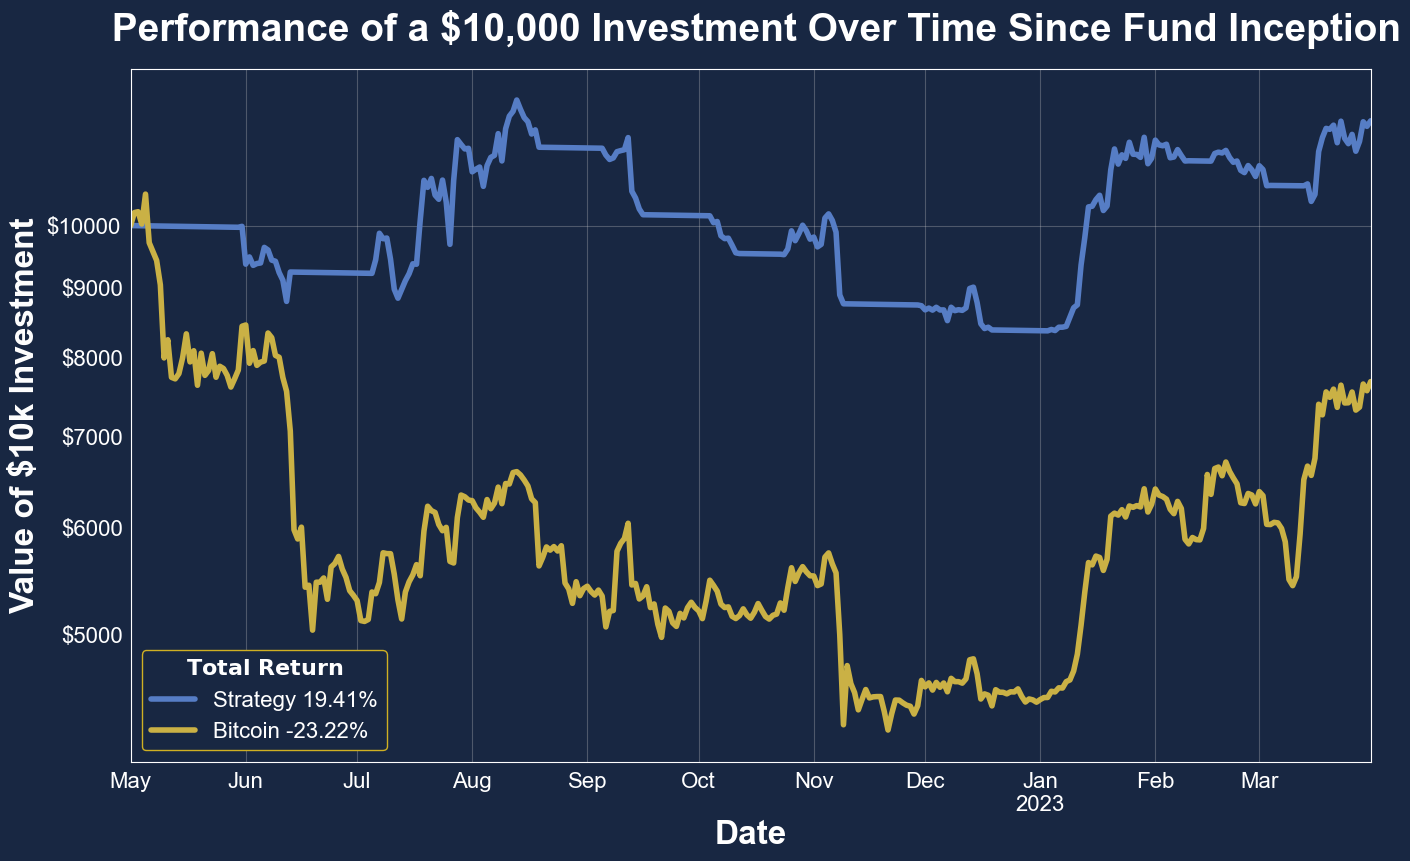

In [9]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[['Strategy', 'Bitcoin']].calc_stats()
strategy_total_return = sample_stats['Strategy'].stats['total_return']
bitcoin_total_return = sample_stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='lower left', title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')


# Full History

In [10]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2023-03-31  2023-03-31
Risk-free rate       0.00%       0.00%

Total Return         484.43%     304.10%
Daily Sharpe         1.23        0.80
Daily Sortino        2.11        1.28
CAGR                 71.30%      53.08%
Max Drawdown         -32.35%     -76.28%
Calmar Ratio         2.20        0.70

MTD                  9.88%       23.01%
3m                   42.65%      72.08%
6m                   17.39%      46.56%
YTD                  42.65%      72.08%
1Y                   16.76%      -36.51%
3Y (ann.)            86.22%      65.24%
5Y (ann.)            71.30%      53.08%
10Y (ann.)           -           -
Since Incep. (ann.)  71.30%      53.08%

Daily Sharpe         1.23        0.80
Daily Sortino        2.11        1.28
Daily Mean (ann.)    43.27%      48.08%
Daily Vol (ann.)     35.09%      60.24%
Daily Skew           0.50        -0.7

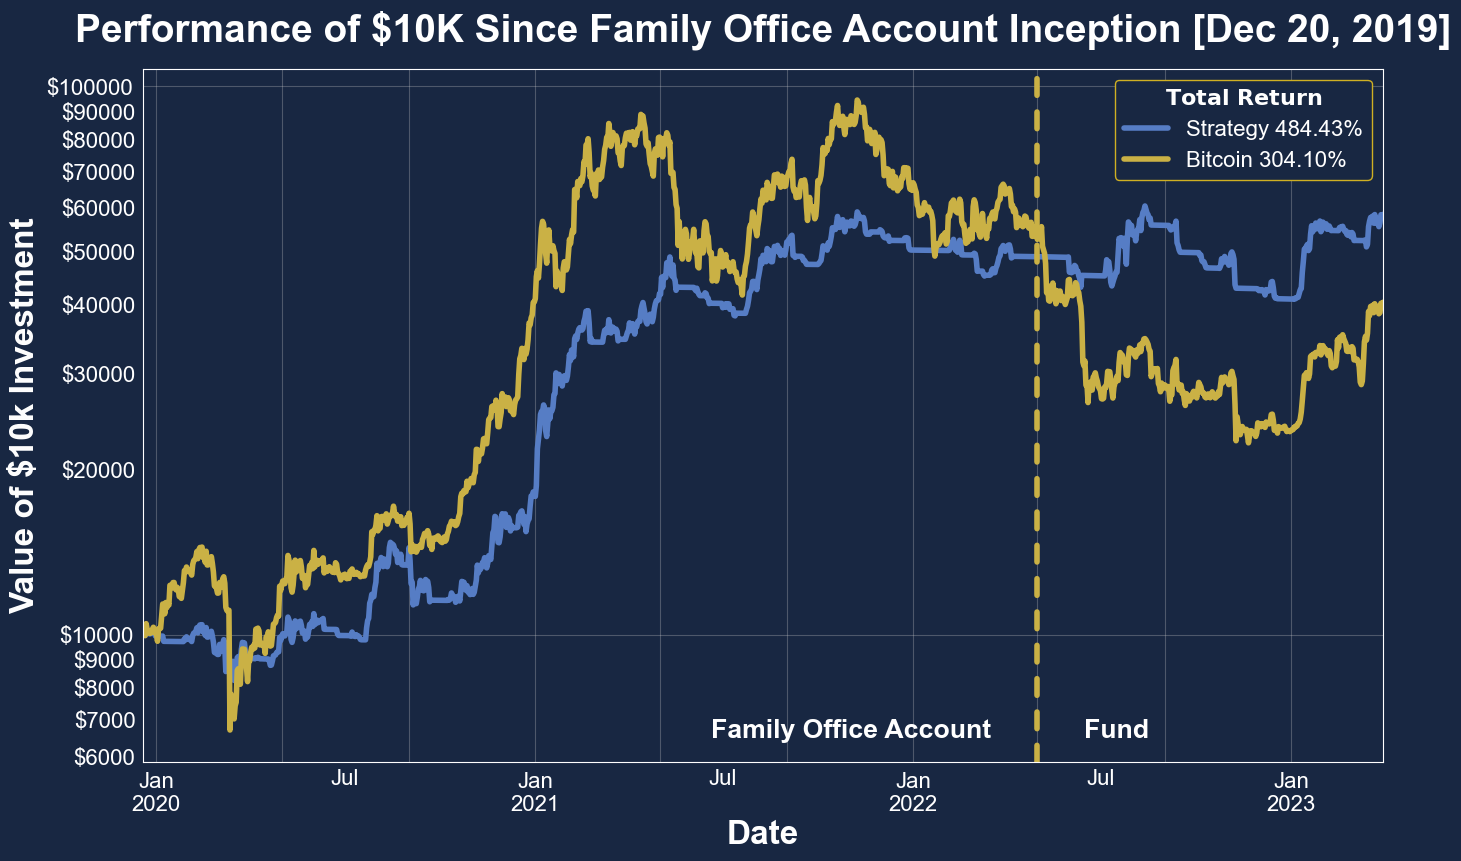

In [11]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
strategy_total_return = stats['Strategy'].stats['total_return']
bitcoin_total_return = stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='upper right', title=r'$\bf{Total\ Return}$')
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.text(dt(2022, 6, 15), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2021, 6, 20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 4)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')


Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-01-01  2022-01-01
End                  2022-12-31  2022-12-31
Risk-free rate       0.00%       0.00%

Total Return         -18.57%     -64.81%
Daily Sharpe         -0.37       -1.10
Daily Sortino        -0.55       -1.65
CAGR                 -18.62%     -64.94%
Max Drawdown         -32.33%     -66.43%
Calmar Ratio         -0.58       -0.98

MTD                  -4.13%      -3.62%
3m                   -17.71%     -14.83%
6m                   -9.29%      -16.55%
YTD                  -18.57%     -64.81%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  -18.62%     -64.94%

Daily Sharpe         -0.37       -1.10
Daily Sortino        -0.55       -1.65
Daily Mean (ann.)    -10.34%     -58.06%
Daily Vol (ann.)     27.90%      52.95%
Daily Skew           0.26        -0.28
Dai

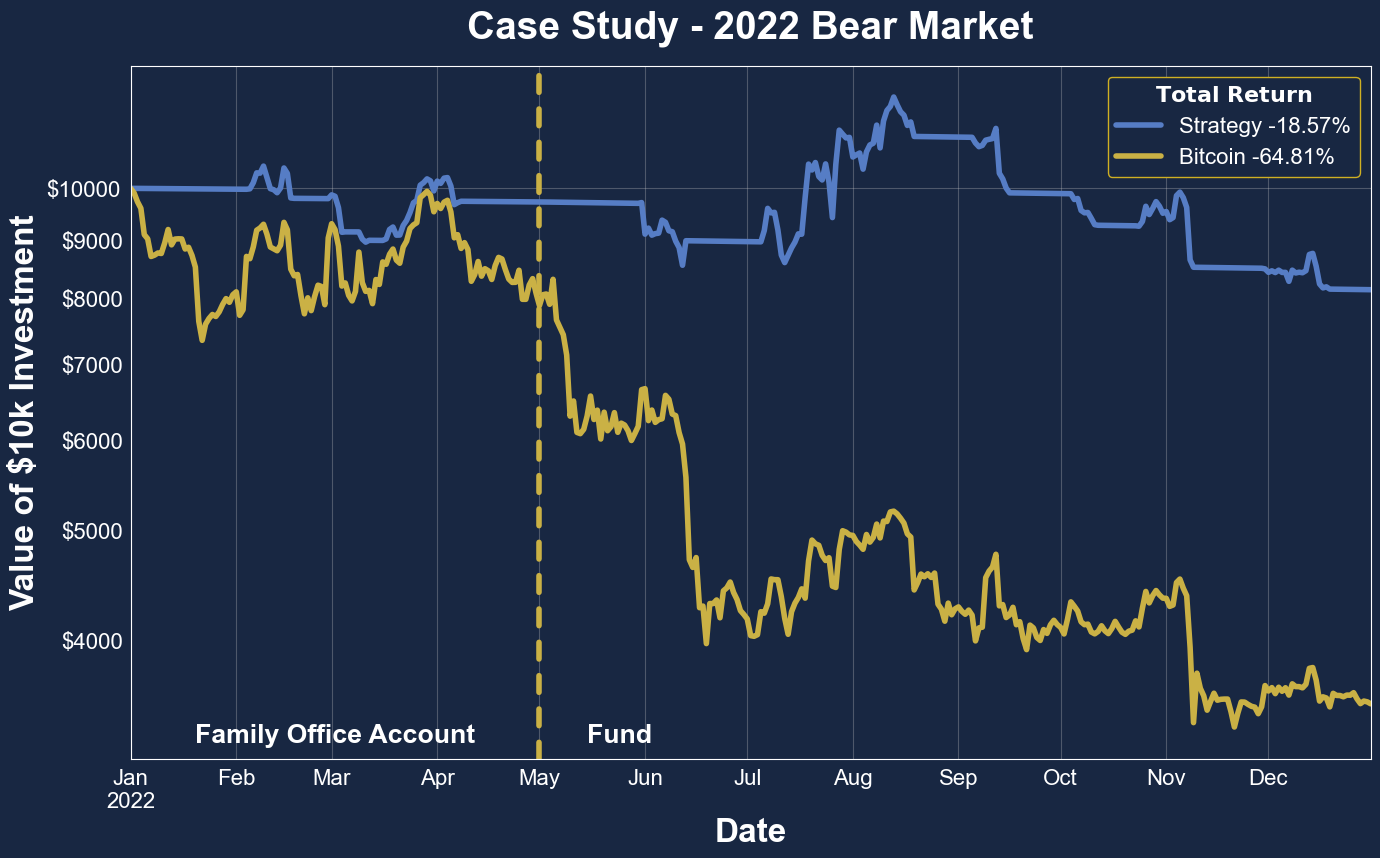

In [12]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[['Strategy', 'Bitcoin']], value=10000)
ax = rebased_sample[['Strategy', 'Bitcoin']].plot.line(title='Case Study - 2022 Bear Market', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[['Strategy', 'Bitcoin']].calc_stats()
rebased_sample_stats.display()
strategy_total_return = rebased_sample_stats['Strategy'].stats['total_return']
bitcoin_total_return = rebased_sample_stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='upper right', title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.text(dt(2022, 5, 15), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 1, 20), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')

,Strategy,Bitcoin
Date,,
2019-12-19,0.0000,0.0000
2019-12-20,0.0000,0.0000
2019-12-21,-0.0054,-0.0077
2019-12-22,0.0000,0.0000
2019-12-23,-0.0173,-0.0246
...,...,...
2023-03-27,-0.0830,-0.5922
2023-03-28,-0.0677,-0.5902
2023-03-29,-0.0361,-0.5738


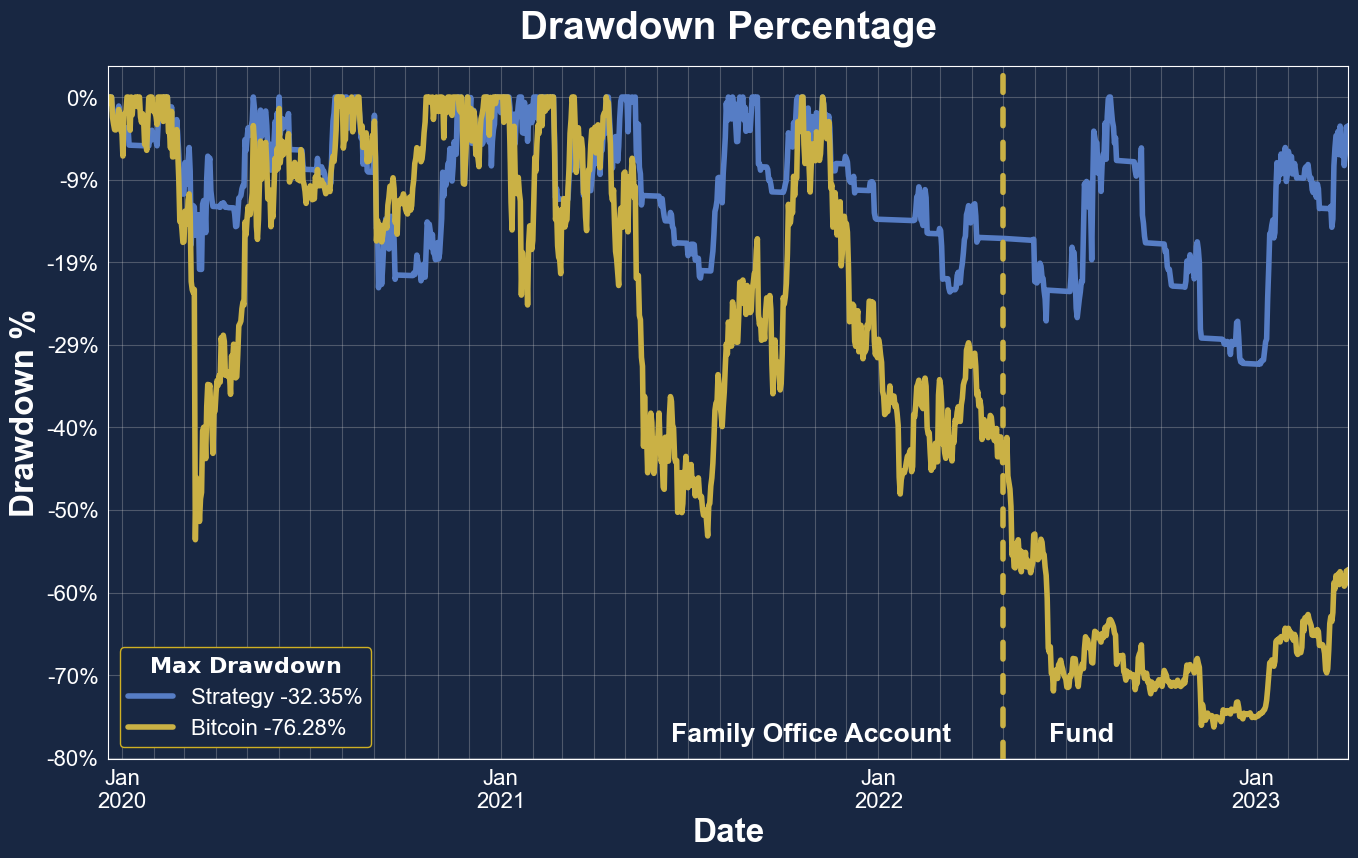

In [13]:
rebased_sample = ffn.rebase(prices[['Strategy', 'Bitcoin']], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'})
rebased_drawdown_stats = rebased_sample[['Strategy', 'Bitcoin']].calc_stats()
# rebased_drawdown_stats.display()
strategy_max_drawdown = rebased_drawdown_stats['Strategy'].stats['max_drawdown']
bitcoin_max_drawdown = rebased_drawdown_stats['Bitcoin'].stats['max_drawdown']
ax.legend(('Strategy {:.2f}%'.format(strategy_max_drawdown * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_max_drawdown * 100.)), loc='lower left', title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round")
ax.text(dt(2022, 6, 15), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2021, 6, 15), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)


fig.savefig('drawdowns.pdf')
drawdowns.to_csv('drawdowns.csv')
drawdowns

In [14]:
strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(total_return)
strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date  Date
2019  12     -0.0041
2020  1      -0.0130
      2      -0.0639
      3      -0.0172
      4       0.0784
      5       0.0441
      6      -0.0877
      7       0.2512
      8       0.0009
      9      -0.1981
      10      0.0315
      11      0.3690
      12      0.1214
2021  1       0.6273
      2       0.1533
      3       0.0415
      4       0.1365
      5       0.0263
      6      -0.0649
      7       0.1174
      8       0.1540
      9      -0.0904
      10      0.1764
      11     -0.0163
      12     -0.0793
2022  1      -0.0016
      2      -0.0189
      3       0.0081
      4      -0.0412
      5      -0.0013
      6      -0.0149
      7       0.2352
      8       0.0413
      9      -0.1081
      10     -0.0391
      11     -0.1098
      12     -0.0346
2023  1       0.3389
      2      -0.0597
      3       0.0790
Name: Strategy, dtype: float64

# Calculate Correlation

In [15]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.6563
Bitcoin,0.6563,1.0000


In [16]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.6563


# Calculate Volatility & Beta

In [17]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.8309
Bitcoin Volatility = 1.525


# Calculate Beta

In [18]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.3576
